<a href="https://colab.research.google.com/github/helmana/DLeeg/blob/master/model%20layers%20pop/*(T)cosian%20dist_%2020%20instance_2000%20pair_%208%20outer%20shift_Threshold%20verification%20Nooo%20Middle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
'''
subject number = 109 >> 90 train subject  + 19 new subject 
channel number = 20 >> [21,23,29,31,33,35,36,40,8,10,12,41,46,48,50,52,54,60,61,62]

model3 -  1 layer pop

** subjects  (train subject (ts) , new subject (ns) ):

1) Train subject i (ts[i] )
2) Train Subject i and Train Subject j (ts[i] , ts[j] )
3) Train subject and New subject  (ts , ns)
4) New subject i ( ns[i] )
5) New Subject i and New Subject j (ns[i] , ns[j] )

'''


'\nsubject number = 109 >> 90 train subject  + 19 new subject \nchannel number = 20 >> [21,23,29,31,33,35,36,40,8,10,12,41,46,48,50,52,54,60,61,62]\n\nmodel3 -  1 layer pop\n\n** subjects  (train subject (ts) , new subject (ns) ):\n\n1) Train subject i (ts[i] )\n2) Train Subject i and Train Subject j (ts[i] , ts[j] )\n3) Train subject and New subject  (ts , ns)\n4) New subject i ( ns[i] )\n5) New Subject i and New Subject j (ns[i] , ns[j] )\n\n'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
!pip install mne

     |████████████████████████████████| 6.4MB 2.8MB/s 


In [0]:
'''
Rivision:
980806:
  First version.
  
  

'''

'\nRivision:\n980806:\n  First version.\n  \n  \n\n'

In [0]:
# Parameters:

EpochNum=60
subject_numberT=109
RemoveBaseLine=0
Orthogonal=1
task_index = [1] # task: REO
list_channel=[21,23,29,31,33,35,36,40,8,10,12,41,46,48,50,52,54,60,61,62]
TryStr='Try1'
seed = 14

task_number=1
task_time = 60
sampel_number_per_sec =  160 # sampel rate
total_sampel_number =  sampel_number_per_sec *task_time # 60*160
#sample_shift = 4 #step len
inner_sample_shift = 4 # inner step len
outer_sample_shift =8  # outer step len
sample_per_window = 160
window_len= 20
batch_size=64

#Search_Space_Channel = [21,23,29,31,33,35,36,40,8,10,12,41,46,48,50,52,54,60,61,62]
#Search_Space_Channel_Name=["Fp1","Fp2","F7","F3","Fz","F4","F8","T7","C3","Cz","C4","T8","P7","P3","Pz","P4","P8","O1","Oz","O2"]


In [47]:
# For Visualization
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa

# General use
import itertools
from itertools import combinations 

import os.path
from scipy.spatial import distance
import numpy as np
import math
import random
import datetime
import time
import pytz
from time import gmtime, strftime
import statistics

# General use
import itertools
from itertools import combinations 
import statistics
import csv
import os.path
from scipy.spatial import distance
import numpy as np
import math
import random
import datetime
import time
import pytz
from time import gmtime, strftime


# For model training
from keras import layers
from keras import models
from keras import regularizers
from keras.utils import to_categorical
from keras import optimizers
from keras import backend as KerasBackend
from keras.models import load_model



# EEG Tools
import mne
from mne.preprocessing import create_ecg_epochs, create_eog_epochs
from mne import io
from mne import viz
from mne import Epochs, io, pick_types
from mne.event import define_target_events
from mne.time_frequency import psd_welch
print(__doc__)



Automatically created module for IPython interactive environment


In [8]:
# load dataset in array
task_number= len(task_index)

# load dataset in array
list_raw_fnames = [[0]*task_number]*subject_numberT
for x in range(subject_numberT):
  list_raw_fnames[x] = mne.datasets.eegbci.load_data(x+1,task_index,path='/content/drive/My Drive/Deep Results/Database')

list_rawdata = np.zeros((subject_numberT,task_number), dtype='object')

for i in range(subject_numberT):
  for j in range(task_number):
    list_rawdata[i][j] = mne.io.read_raw_edf(list_raw_fnames[i][j], preload=True)


Do you want to set the path:
    /content/drive/My Drive/Deep Results/Database
as the default EEGBCI dataset path in the mne-python config [y]/n? y
Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json
Extracting EDF parameters from /content/drive/My Drive/Deep Results/Database/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /content/drive/My Drive/Deep Results/Database/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /content/drive/My Drive/Deep Results/Database/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.in

In [108]:
subject_number = 90
# new subject
new_subject =np.arange(subject_number, subject_numberT)

# img for each subject
subject_img_number = math.floor((total_sampel_number - sample_per_window - (window_len-1 )*inner_sample_shift) / outer_sample_shift) +1
np.random.seed(seed)  

subject_number_array_shuffled=np.arange(subject_number)
np.random.shuffle(subject_number_array_shuffled)

subject_img_number_array_shuffled=np.arange(subject_img_number)
np.random.shuffle(subject_img_number_array_shuffled)

train_index = math.floor(len(subject_img_number_array_shuffled)* 0.75)
val_index = train_index + (train_index//5)

train_shuff = subject_img_number_array_shuffled[:train_index]
val_shuff = subject_img_number_array_shuffled[train_index:val_index]
test_shuff = subject_img_number_array_shuffled[val_index:]


train_number = len(train_shuff)
val_number = len(val_shuff)
test_number = len(test_shuff)
subject_img_number

1171

In [0]:
def normalize_channel_data(ch , i, ch_min, ch_max):
  ch = ((ch - ch_min[i]) / (ch_max[i] - ch_min[i] ))
  return ch

def ProjectionVector(VecA,VecB):
    Projeted_VecB_on_VecA=np.dot(VecA,VecB)/np.dot(VecA,VecA)*VecA
    return Projeted_VecB_on_VecA

In [0]:
#################################################################################################
## Define General Data Generator
def GenerateGeneralData(BatchSize,ListRawDataMain,SubjectArrayShuffled,ListChannel,RemoveBaseLineFlag,OrthogonalFlag,ImageArrayShuffled,WindowLen,OuterSampleShift,InnerSampleShift,SampelNumberPerSec):
    
    Iter=0
    #ch_number=len(ListChannel)
    
    
    ##########################################################
    # Pre-Proceesing On Raw Data
    ListRawDataTemp=ListRawDataMain.copy()
    
    DataAllChannelsRawPerSubject, times =(ListRawDataTemp[0][0][:64,:9600])

    DataChannelsRaw   =np.zeros((len(SubjectArrayShuffled),ch_number,times.size),dtype = float)
    DataChannelsNormal=np.zeros((len(SubjectArrayShuffled),ch_number,times.size),dtype = float)
    DataChannelsOrt   =np.zeros((len(SubjectArrayShuffled),ch_number,times.size),dtype = float)
    e= 0    
    for s in SubjectArrayShuffled:

        DataAllChannelsRawPerSubject, times =(ListRawDataTemp[s][0][:64,:9600])
        
        # Extrac Channel T9 or T10 as Baseline
        DataChannelT9Raw =DataAllChannelsRawPerSubject[43]# Ch T9 (42) or T10 (43)


        ch_max =[]
        ch_min =[]
        # Extract Selected Channels+ Remove Baseline+ Normailze
        
        for i in range(len(ListChannel)):
            DataChannelsRaw[e][i]=DataAllChannelsRawPerSubject[ListChannel[i]].copy() -DataChannelT9Raw*RemoveBaseLineFlag

            ch_max = np.append(ch_max, max(DataChannelsRaw[e][i])) # max for each cannel
            ch_min = np.append(ch_min, min(DataChannelsRaw[e][i])) # min for each cannel

            DataChannelsNormal[e][i]=normalize_channel_data(DataChannelsRaw[e][i].copy(), i, ch_min, ch_max)
        e = e+1

        # Orthogonal Channel
        #DataChannelsOrt[e][0]=DataChannelsNormal[e][0]
        #DataChannelsOrt[e][1]=DataChannelsNormal[e][1]-ProjectionVector(DataChannelsNormal[e][0].copy(),DataChannelsNormal[e][1].copy())*OrthogonalFlag
        
        
        
    ##########################################################
    # Generate Data for Network
    while True:

      for j in ImageArrayShuffled:
          r = 0
          for s in SubjectArrayShuffled:

              if Iter ==0:
                  TrainImage=np.zeros((BatchSize, ch_number, WindowLen, sample_per_window), dtype = float)
                  TrainLabel=np.zeros((BatchSize),dtype=int)

              for i in range(len(ListChannel)):
                  for z in range (WindowLen):
                      ExtractedData = DataChannelsNormal[r][i][0+j*OuterSampleShift + z*InnerSampleShift:sample_per_window+ j*OuterSampleShift + z*InnerSampleShift]
                      TrainImage[Iter][i][z] = ExtractedData.copy()# Data
              r=r+1

              TrainLabel[Iter] = s # label

              Iter=Iter+1
              #Count=Count+1
              if Iter==BatchSize:
                Iter=0
                #print('Count=',Count)
                TrainLabelClass=to_categorical(TrainLabel,subject_numberT)
                TI = np.moveaxis(TrainImage, 1, -1)
                yield TI, TrainLabelClass 

                

In [0]:
ch_number=len(list_channel)
list_rawdataTemp=list_rawdata.copy()


In [0]:
#model.save('/content/drive/My Drive/mymodels/160newmodel_task1.h5')

In [112]:
model = load_model('/content/drive/My Drive/mymodels/model2_2.h5')
model.summary()
model.pop()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 20, 160, 64)       11584     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 10, 80, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 78, 128)        73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 39, 128)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 2, 37, 256)        295168    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 1, 18, 256)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)             

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [0]:
def subject_Predict_generator(batch_size, mymodel, subject_arr, img_arr ):
  sn = len(subject_arr)
  imgn = len(img_arr)
  pre_GenTestData=GenerateGeneralData(BatchSize=batch_size,
                                  ListRawDataMain=list_rawdataTemp.copy(),
                                  SubjectArrayShuffled= subject_arr,
                                  ListChannel=list_channel,
                                  RemoveBaseLineFlag=RemoveBaseLine,
                                  OrthogonalFlag=Orthogonal,
                                  WindowLen=window_len,
                                  OuterSampleShift=outer_sample_shift,
                                  InnerSampleShift=inner_sample_shift,
                                  SampelNumberPerSec=sampel_number_per_sec,
                                  ImageArrayShuffled= img_arr)

  pre_Subject = mymodel.predict_generator(pre_GenTestData,steps=np.ceil(imgn*sn/batch_size))
  return pre_Subject

In [0]:
total_vector=[]
subject_img_idx_array = np.arange(subject_img_number)

for i in range(109):
  Si_vectors = subject_Predict_generator(len(subject_img_idx_array), model, [i], subject_img_idx_array)
  total_vector.append(Si_vectors)



In [114]:
import h5py
#hf = h5py.File('/content/drive/My Drive/Deep Results/total_vectors_model2_2_160spw_160shift.h5', 'w')
#hf.create_dataset('/content/drive/My Drive/Deep Results/dataset_total_vectors', data=total_vector)
#hf.close()
#hf = h5py.File('/content/drive/My Drive/Deep Results/total_vectors_model2_2_160spw_160shift.h5', 'r')
#vec = hf.get('/content/drive/My Drive/Deep Results/dataset_total_vectors')
#vec
hf = h5py.File('/content/drive/My Drive/Deep Results/total_vectors2.h5', 'r')
vec = hf.get('/content/drive/My Drive/Deep Results/dataset_total_vectors')
vec

<HDF5 dataset "dataset_total_vectors": shape (109, 1171, 64), type "<f4">

In [0]:
### verification with middle of samples

def VerifySubject(threshold, s1, smp1, s2, smp2):
  #list_d =[]

  #for i in range(len(smp1)):
    #print(s1 ,vec1[i] )
  d= distance.cosine(vec[s1][smp1], vec[s2][smp2])
    #list_d.append(d)
  #midd = statistics.median_low(list_d)

  if (d) <threshold :
    return 0 # same
  else:
    return 1 # different


array([0, 1])

In [0]:
### generate data for verification
def counter_true_false_result(start_index_s1, end_index_s1 ,start_index_s2, end_index_s2 ):
  
  threshold = 0
  pair_number = 2000
  sample_img_num = 20
  Batch_size = 20
  ITER = pair_number //2


  path = "/content/drive/My Drive/z_Middle Verification Threshold_EER/"+"h5 file-cosian dist task1" +str(sample_img_num)+"sample num_"+str(pair_number)+"pair_"+ "ouer shift" + str(outer_sample_shift)

  try:
      os.mkdir(path)
  except OSError:
      print ("Creation of the directory %s failed" % path)
  else:
      print ("Successfully created the directory %s " % path)



  
  ## CSV file name 
  csvFileName =str(sample_img_num)+"sample num_"+str(pair_number)+"pair"+ "_MIDDLE threshold_S1(" + str(start_index_s1)+ "-" + str(end_index_s1) + ")_S2("+ str(start_index_s2)+ "-" + str(end_index_s2) + ")" +".csv"
  completeName = os.path.join(path, csvFileName )

  png_FileName =str(sample_img_num)+"sample num_"+str(pair_number)+"pair"+ "_NOOO MIDDLE threshold_S1(" + str(start_index_s1)+ "-" + str(end_index_s1) + ")_S2("+ str(start_index_s2)+ "-" + str(end_index_s2) + ")" +".png"
  png_completeName = os.path.join(path, png_FileName )

  list_threshold = []
  list_TP = []
  list_TN = []
  list_FP = []
  list_FN = []
  list_FRR = []
  list_FAR = []
  list_EER = []
  list_Correct_Verifi_Percentage = []
  list_threshold_result =[]


  for j in range(1,40):

      threshold =0.150+ (j*0.002)
      #threshold = j
      TP =0
      TN =0
      FP =0
      FN =0
      FAR =0
      FRR =0
      EER =0
      true_result= 0
      false_result = 0
      Correct_Verifi_Percentage = 0

      for i in range(ITER):
        
          # subject 1 Genuine
          S1_rand = random.randint(start_index_s1, end_index_s1)
          # shuffled img indx array
          pre_S1_img_shuffled1 = random.randint(0,subject_img_number-10)
          #np.random.shuffle(pre_S1_img_shuffled)
          pre_S1_img_shuffled2 = random.randint(0,subject_img_number-10)
          while(pre_S1_img_shuffled1 == pre_S1_img_shuffled2):
            pre_S1_img_shuffled2 = random.randint(0,subject_img_number)



          #np.random.shuffle(pre_S1_img_shuffled)

          # group sample 1
          S1_Sample_rand1 = pre_S1_img_shuffled1
          # group sample 2
          S1_Sample_rand2 = pre_S1_img_shuffled2

          # Genuine verify
          result1 = VerifySubject( threshold, S1_rand, S1_Sample_rand1, S1_rand, S1_Sample_rand2)
          
          if result1 == 0:
            true_result = true_result+1
            TP = TP +1 #TP
          else:
            false_result = false_result+1
            FN = FN +1

          # subject 2
          S2_rand = random.randint(start_index_s2, end_index_s2)
          while S2_rand == S1_rand:
            S2_rand = random.randint(start_index_s2, end_index_s2)

          # shuffled img indx array
          pre_S2_img_shuffled=random.randint(0,subject_img_number-10)
          #np.random.shuffle(pre_S2_img_shuffled)
          # group sample
          S2_Sample_rand = pre_S2_img_shuffled

          # Impostor vrify
          result2 = VerifySubject( threshold, S1_rand, S1_Sample_rand1, S2_rand, S2_Sample_rand)

          if result2 == 1:
            true_result = true_result+1
            TN = TN +1
          else: 
            false_result = false_result+1
            FP = FP +1
        
      #print(result1 , result2)
      Correct_Verifi_Percentage = (true_result *100) / (true_result + false_result)
      FAR = FP / (FP+TN)
      FRR = FN / (FN+TP)
      EER = (FAR+FRR) / 2

      list_threshold.append(threshold)
      list_TP.append(TP)
      list_TN.append(TN)
      list_FP.append(FP)
      list_FN.append(FN)
      list_FAR.append(FAR)
      list_FRR.append(FRR)
      list_EER.append(EER)
      list_Correct_Verifi_Percentage.append(Correct_Verifi_Percentage)
      ## print result
      print(threshold,'.', '\n', Correct_Verifi_Percentage,'%','\n',"true_result:",true_result,"false_result:",false_result,'\n',"TP:",TP,"FN:",FN,"FRR:",FRR ,'\n',"TN:",TN,"FP:",FP,"FAR:", FAR,'\n',"EER:",EER,'\n' )

  ##plot
  plt.plot(list_FRR, list_FAR  ) 
  plt.xlabel('FRR') 
  plt.ylabel('FAR') 
  plt.legend()
  plt.savefig(png_completeName) 


  list_threshold_result.append([(list_threshold[j], list_Correct_Verifi_Percentage[j], list_TP[j], list_FN[j], list_TN[j], list_FP[j], list_FAR[j], list_FRR[j] , list_EER[j] ) for j in range(len(list_Correct_Verifi_Percentage)) ])

  with open(completeName, 'w+') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                          quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerows(list_threshold_result[0])


Creation of the directory /content/drive/My Drive/z_Middle Verification Threshold_EER/h5 file-cosian dist task120sample num_2000pair_ouer shift8 failed
0.14200000000000002 . 
 96.2 % 
 true_result: 1924 false_result: 76 
 TP: 941 FN: 59 FRR: 0.059 
 TN: 983 FP: 17 FAR: 0.017 
 EER: 0.038 

0.14400000000000002 . 
 95.2 % 
 true_result: 1904 false_result: 96 
 TP: 931 FN: 69 FRR: 0.069 
 TN: 973 FP: 27 FAR: 0.027 
 EER: 0.048 

0.14600000000000002 . 
 94.7 % 
 true_result: 1894 false_result: 106 
 TP: 923 FN: 77 FRR: 0.077 
 TN: 971 FP: 29 FAR: 0.029 
 EER: 0.053 

0.14800000000000002 . 
 96.35 % 
 true_result: 1927 false_result: 73 
 TP: 944 FN: 56 FRR: 0.056 
 TN: 983 FP: 17 FAR: 0.017 
 EER: 0.036500000000000005 

0.15000000000000002 . 
 96.2 % 
 true_result: 1924 false_result: 76 
 TP: 956 FN: 44 FRR: 0.044 
 TN: 968 FP: 32 FAR: 0.032 
 EER: 0.038 

0.15200000000000002 . 
 94.85 % 
 true_result: 1897 false_result: 103 
 TP: 939 FN: 61 FRR: 0.061 
 TN: 958 FP: 42 FAR: 0.042 
 EER: 0.0

No handles with labels found to put in legend.


0.21800000000000003 . 
 93.15 % 
 true_result: 1863 false_result: 137 
 TP: 989 FN: 11 FRR: 0.011 
 TN: 874 FP: 126 FAR: 0.126 
 EER: 0.0685 



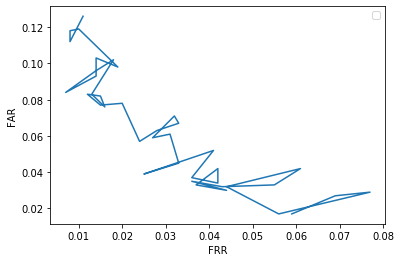

In [127]:
#1. train subject , train subject
counter_true_false_result(0,89, 0,89) 

Creation of the directory /content/drive/My Drive/z_Middle Verification Threshold_EER/h5 file-cosian dist task120sample num_2000pair_ouer shift8 failed
0.14200000000000002 . 
 96.35 % 
 true_result: 1927 false_result: 73 
 TP: 952 FN: 48 FRR: 0.048 
 TN: 975 FP: 25 FAR: 0.025 
 EER: 0.036500000000000005 

0.14400000000000002 . 
 95.2 % 
 true_result: 1904 false_result: 96 
 TP: 934 FN: 66 FRR: 0.066 
 TN: 970 FP: 30 FAR: 0.03 
 EER: 0.048 

0.14600000000000002 . 
 95.8 % 
 true_result: 1916 false_result: 84 
 TP: 939 FN: 61 FRR: 0.061 
 TN: 977 FP: 23 FAR: 0.023 
 EER: 0.041999999999999996 

0.14800000000000002 . 
 95.35 % 
 true_result: 1907 false_result: 93 
 TP: 935 FN: 65 FRR: 0.065 
 TN: 972 FP: 28 FAR: 0.028 
 EER: 0.0465 

0.15000000000000002 . 
 95.9 % 
 true_result: 1918 false_result: 82 
 TP: 935 FN: 65 FRR: 0.065 
 TN: 983 FP: 17 FAR: 0.017 
 EER: 0.041 

0.15200000000000002 . 
 96.1 % 
 true_result: 1922 false_result: 78 
 TP: 962 FN: 38 FRR: 0.038 
 TN: 960 FP: 40 FAR: 0.0

No handles with labels found to put in legend.


0.21800000000000003 . 
 91.0 % 
 true_result: 1820 false_result: 180 
 TP: 992 FN: 8 FRR: 0.008 
 TN: 828 FP: 172 FAR: 0.172 
 EER: 0.09 



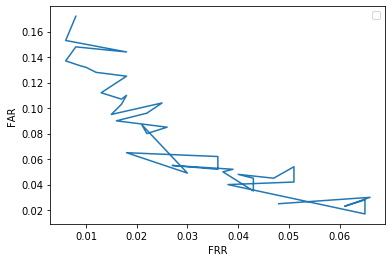

In [128]:
#2. train subject , new subject

counter_true_false_result(0,89, 90,107)

Creation of the directory /content/drive/My Drive/z_Middle Verification Threshold_EER/h5 file-cosian dist task120sample num_2000pair_ouer shift8 failed
0.182 . 
 87.75 % 
 true_result: 1755 false_result: 245 
 TP: 835 FN: 165 FRR: 0.165 
 TN: 920 FP: 80 FAR: 0.08 
 EER: 0.1225 

0.184 . 
 87.8 % 
 true_result: 1756 false_result: 244 
 TP: 831 FN: 169 FRR: 0.169 
 TN: 925 FP: 75 FAR: 0.075 
 EER: 0.122 

0.186 . 
 87.85 % 
 true_result: 1757 false_result: 243 
 TP: 838 FN: 162 FRR: 0.162 
 TN: 919 FP: 81 FAR: 0.081 
 EER: 0.1215 

0.188 . 
 87.05 % 
 true_result: 1741 false_result: 259 
 TP: 832 FN: 168 FRR: 0.168 
 TN: 909 FP: 91 FAR: 0.091 
 EER: 0.1295 

0.19 . 
 89.85 % 
 true_result: 1797 false_result: 203 
 TP: 868 FN: 132 FRR: 0.132 
 TN: 929 FP: 71 FAR: 0.071 
 EER: 0.1015 

0.192 . 
 87.6 % 
 true_result: 1752 false_result: 248 
 TP: 842 FN: 158 FRR: 0.158 
 TN: 910 FP: 90 FAR: 0.09 
 EER: 0.124 

0.194 . 
 87.0 % 
 true_result: 1740 false_result: 260 
 TP: 831 FN: 169 FRR: 0.1

No handles with labels found to put in legend.


0.258 . 
 83.15 % 
 true_result: 1663 false_result: 337 
 TP: 935 FN: 65 FRR: 0.065 
 TN: 728 FP: 272 FAR: 0.272 
 EER: 0.1685 



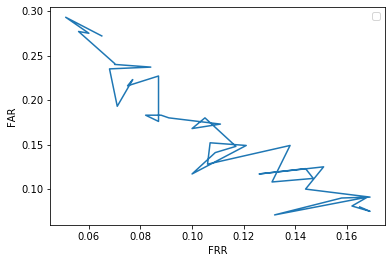

In [131]:
#3. new subject , new subject

counter_true_false_result(90,107, 0,89)

Creation of the directory /content/drive/My Drive/z_Middle Verification Threshold_EER/h5 file-cosian dist task120sample num_2000pair_ouer shift8 failed
0.182 . 
 86.75 % 
 true_result: 1735 false_result: 265 
 TP: 828 FN: 172 FRR: 0.172 
 TN: 907 FP: 93 FAR: 0.093 
 EER: 0.1325 

0.184 . 
 85.6 % 
 true_result: 1712 false_result: 288 
 TP: 814 FN: 186 FRR: 0.186 
 TN: 898 FP: 102 FAR: 0.102 
 EER: 0.144 

0.186 . 
 85.75 % 
 true_result: 1715 false_result: 285 
 TP: 821 FN: 179 FRR: 0.179 
 TN: 894 FP: 106 FAR: 0.106 
 EER: 0.1425 

0.188 . 
 85.4 % 
 true_result: 1708 false_result: 292 
 TP: 807 FN: 193 FRR: 0.193 
 TN: 901 FP: 99 FAR: 0.099 
 EER: 0.14600000000000002 

0.19 . 
 85.35 % 
 true_result: 1707 false_result: 293 
 TP: 827 FN: 173 FRR: 0.173 
 TN: 880 FP: 120 FAR: 0.12 
 EER: 0.1465 

0.192 . 
 85.05 % 
 true_result: 1701 false_result: 299 
 TP: 822 FN: 178 FRR: 0.178 
 TN: 879 FP: 121 FAR: 0.121 
 EER: 0.1495 

0.194 . 
 86.15 % 
 true_result: 1723 false_result: 277 
 TP: 

No handles with labels found to put in legend.


0.258 . 
 79.65 % 
 true_result: 1593 false_result: 407 
 TP: 950 FN: 50 FRR: 0.05 
 TN: 643 FP: 357 FAR: 0.357 
 EER: 0.2035 



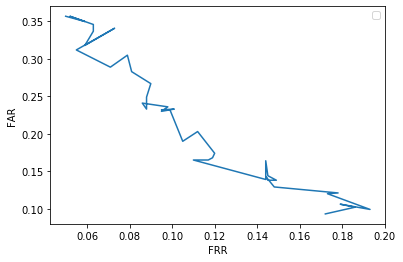

In [132]:
#4. new subject , new subject

counter_true_false_result(90,107, 90,107)

Creation of the directory /content/drive/My Drive/z_Middle Verification Threshold_EER/h5 file-cosian dist task120sample num_2000pair_ouer shift8 failed
0.152 . 
 94.35 % 
 true_result: 1887 false_result: 113 
 TP: 918 FN: 82 FRR: 0.082 
 TN: 969 FP: 31 FAR: 0.031 
 EER: 0.0565 

0.154 . 
 93.9 % 
 true_result: 1878 false_result: 122 
 TP: 903 FN: 97 FRR: 0.097 
 TN: 975 FP: 25 FAR: 0.025 
 EER: 0.061 

0.156 . 
 94.3 % 
 true_result: 1886 false_result: 114 
 TP: 923 FN: 77 FRR: 0.077 
 TN: 963 FP: 37 FAR: 0.037 
 EER: 0.056999999999999995 

0.158 . 
 94.35 % 
 true_result: 1887 false_result: 113 
 TP: 925 FN: 75 FRR: 0.075 
 TN: 962 FP: 38 FAR: 0.038 
 EER: 0.056499999999999995 

0.16 . 
 93.45 % 
 true_result: 1869 false_result: 131 
 TP: 905 FN: 95 FRR: 0.095 
 TN: 964 FP: 36 FAR: 0.036 
 EER: 0.0655 

0.162 . 
 93.9 % 
 true_result: 1878 false_result: 122 
 TP: 915 FN: 85 FRR: 0.085 
 TN: 963 FP: 37 FAR: 0.037 
 EER: 0.061 

0.164 . 
 94.65 % 
 true_result: 1893 false_result: 107 
 

No handles with labels found to put in legend.


0.22799999999999998 . 
 90.25 % 
 true_result: 1805 false_result: 195 
 TP: 979 FN: 21 FRR: 0.021 
 TN: 826 FP: 174 FAR: 0.174 
 EER: 0.09749999999999999 



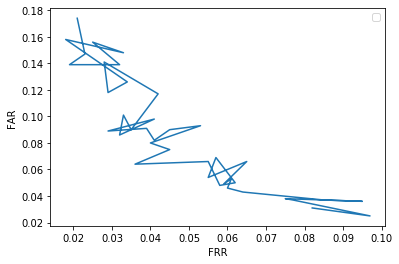

In [134]:
#5. all subject , all subject

counter_true_false_result(0,107, 0,107)